# Pickle in Python: Object Serialization
Discover the Python pickle module: learn about serialization, when (not) to use it, how to compress pickled objects, multiprocessing, and much more!

As a data scientist, you will use sets of data in the form of dictionaries, DataFrames, or any other data type. When working with those, you might want to save them to a file, so you can use them later on or send them to someone else. This is what Python's pickle module is for: it serializes objects so they can be saved to a file, and loaded in a program again later on.


# What is pickling?
Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object. Pickling is not to be confused with compression! The former is the conversion of an object from one representation (data in Random Access Memory (RAM)) to another (text on disk), while the latter is the process of encoding data with fewer bits, in order to save disk space.

# What Can You Do With pickle?
Pickling is useful for applications where you need some degree of persistency in your data. Your program's state data can be saved to disk, so you can continue working on it later on. It can also be used to send data over a Transmission Control Protocol (TCP) or socket connection, or to store python objects in a database. Pickle is very useful for when you're working with machine learning algorithms, where you want to save them to be able to make new predictions at a later time, without having to rewrite everything or train the model all over again.

# When Not To Use pickle
If you want to use data across different programming languages, pickle is not recommended. Its protocol is specific to Python, thus, cross-language compatibility is not guaranteed. The same holds for different versions of Python itself. Unpickling a file that was pickled in a different version of Python may not always work properly, so you have to make sure that you're using the same version and perform an update if necessary. You should also try not to unpickle data from an untrusted source. Malicious code inside the file might be executed upon unpickling.

# Storing data with pickle
You can pickle objects with the following data types:

Booleans,
Integers,
Floats,
Complex numbers,
(normal and Unicode) Strings,
Tuples,
Lists,
Sets, and
Dictionaries that contain picklable objects.

All the above can be pickled, but you can also do the same for classes and functions, for example, if they are defined at the top level of a module.

Not everything can be pickled (easily), though: examples of this are generators, inner classes, lambda functions and defaultdicts. In the case of lambda functions, you need to use an additional package named dill. With defaultdicts, you need to create them with a module-level function.

# Pickle vs JSON
JSON stands for JavaScript Object Notation. It's a lightweight format for data-interchange, that is easily readable by humans. Although it was derived from JavaScript, JSON is standardized and language-independent. This is a serious advantage over pickle. It's also more secure and much faster than pickle.

However, if you only need to use Python, then the pickle module is still a good choice for its ease of use and ability to reconstruct complete Python objects.

An alternative is cPickle. It is nearly identical to pickle, but written in C, which makes it up to 1000 times faster. For small files, however, you won't notice the difference in speed. Both produce the same data streams, which means that Pickle and cPickle can use the same files.

# Pickling files

In [2]:
# To use pickle, start by importing it in Python.
import pickle

In [3]:
#For this tutorial, you will be pickling a simple dictionary. A dictionary is a list of key : value elements. 
#You will save it to a file and then load again. Declare the dictionary as such:
dogs_dict = { 'Ozzy': 3, 'Filou': 8, 'Luna': 5, 'Skippy': 10, 'Barco': 12, 'Balou': 9, 'Laika': 16 }

In [4]:
filename = 'dogs'
outfile = open(filename,'wb')

In [5]:
pickle.dump(dogs_dict,outfile)
outfile.close()

# Unpickling files

In [7]:
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()

In [8]:
print(new_dict)
print(new_dict==dogs_dict)
print(type(new_dict))

{'Ozzy': 3, 'Filou': 8, 'Luna': 5, 'Skippy': 10, 'Barco': 12, 'Balou': 9, 'Laika': 16}
True
<class 'dict'>


# Compressing pickle files

In [10]:
import bz2
import pickle

sfile = bz2.BZ2File('smallerfile', 'w')
pickle.dump(dogs_dict, sfile)

# Unpickling Python 2 objects in Python 3

In [12]:
infile = open(filename,'rb')
new_dict = pickle.load(infile, encoding='latin1')

In [13]:
infile = open(filename,'rb')
new_dict = pickle.load(infile, encoding='bytes')

# Pickle and multiprocessing

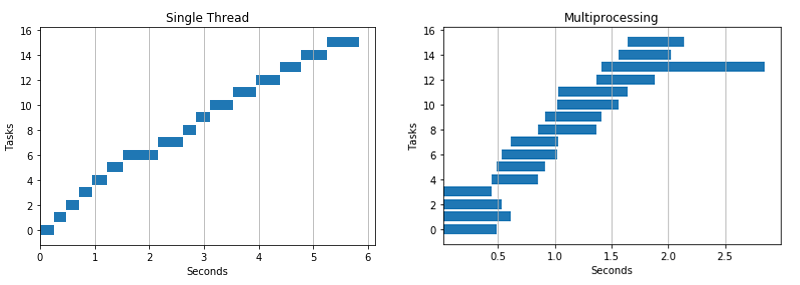

In [14]:
import multiprocessing as mp
from math import cos

p = mp.Pool(2)

p.map(cos, range(10))

[1.0,
 0.5403023058681398,
 -0.4161468365471424,
 -0.9899924966004454,
 -0.6536436208636119,
 0.28366218546322625,
 0.960170286650366,
 0.7539022543433046,
 -0.14550003380861354,
 -0.9111302618846769]

In [16]:
p.map(lambda x: 2**x, range(10))

PicklingError: Can't pickle <function <lambda> at 0x000001D8AF99DA68>: attribute lookup <lambda> on __main__ failed

In [18]:
import dill

dill.dump(lambda x: x**2, open('dillfile','wb'))

In [20]:
import pathos.multiprocessing as mp

p = mp.Pool(2)

p.map(lambda x: 2**x, range(10))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]